# Курсовая работа
## Выполнил студент группы БФИ2202 Пляго Павел Анатольевич

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу Общая стоимость
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.


## Ход работы

Для выполнения задания подготовим необходимые настройки. Подключим библиотеки, реализуем хэш-таблицы и сортировку пузырьком.

In [1]:
import csv
import matplotlib.pyplot as plt

# Создаем класс узла списка
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10 # начальная емкость таблицы
        self.size = 0 # количество элементов в таблице
        self.buckets = [None] * self.capacity # создаем пустые списки для каждой ячейки таблицы
  
    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()
  
    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None
    
    def keys(self):
        keys_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                keys_list.append(node.key)
                node = node.next
        return keys_list

    def items(self):
        items_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                items_list.append((node.key, node.value))
                node = node.next
        return items_list

    def values(self):
        values_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                values_list.append(node.value)
                node = node.next
        return values_list

  
    # Метод удаления элемента из таблицы
    def remove(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        prev = None
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2 # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets
        
# Функция сортировки пузырьком
def bubble_sort(arr, key_index, descending=True):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if (arr[j][key_index] < arr[j+1][key_index] and descending) or (arr[j][key_index] > arr[j+1][key_index] and not descending):
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

Считаем полученный файл из CSV файла и по этим данным сделаем рассчеты и выведем: общую выручку магазина, товар, который был продан наибольшее количество раз, товар, который принес наибольшую выручку и количестве проданных единиц каждого товар.

In [2]:
# Функция для чтения данных из CSV файла
def read_sales_data(file_path):
    sales_data = []
    try:
        with open(file_path, mode='r', encoding='utf-8') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                sales_data.append(row)
    except IOError as e:
        print(f"Error reading file {file_path}: {e}")
    return sales_data

# Функция для расчета метрик
def calculate_metrics(sales_data):
    total_revenue = sum(float(row['Общая стоимость']) for row in sales_data)
    product_sales = HashTable()
    product_revenue = HashTable()

    for row in sales_data:
        product_name = row['Название товара']
        sales_count = int(row['Количество продаж'])
        revenue = float(row['Общая стоимость'])

        product_sales.add(product_name, sales_count)
        product_revenue.add(product_name, revenue)

    product_revenue_share = {product: product_revenue.get(product) / total_revenue for product in product_revenue.keys()}
    
    # Преобразование хеш-таблиц в списки для сортировки
    product_sales_list = product_sales.items()
    product_revenue_list = product_revenue.items()
    
    # Сортировка пузырьком
    sorted_sales = bubble_sort(product_sales_list, key_index=1)
    sorted_revenue = bubble_sort(product_revenue_list, key_index=1)
    
    most_sold_product = sorted_sales[0]
    highest_revenue_product = sorted_revenue[0]
    
    return total_revenue, product_sales, product_revenue, product_revenue_share, most_sold_product, highest_revenue_product

def print_report(total_revenue, product_sales, product_revenue_share, most_sold_product, highest_revenue_product):
    print(f"Общая выручка магазина: {total_revenue:.2f} руб")
    print(f"\nТовар, который был продан наибольшее количество раз: {most_sold_product[0]} ({most_sold_product[1]} раз)")
    print(f"Товар, который принес наибольшую выручку: {highest_revenue_product[0]} ({highest_revenue_product[1]:.2f} руб)")
    
    print("\nКоличество проданных единиц и доля в общей выручке каждого товара:")
    # Создаем список кортежей (товар, количество продаж, доля выручки)
    combined_data = [
        (product, product_sales.get(product), product_revenue_share.get(product))
        for product in product_sales.keys()
    ]
    # Сортируем по количеству продаж (второй элемент кортежа)
    combined_data.sort(key=lambda x: x[1], reverse=True)
    
    for product, sales, share in combined_data:
        print(f"{product}: {sales} шт, {share:.2%}")
    
    

# Путь к файлу с данными
file_path = 'sales_data.csv' 

# Чтение данных и расчет метрик
sales_data = read_sales_data(file_path)
total_revenue, product_sales, product_revenue, product_revenue_share, most_sold_product, highest_revenue_product = calculate_metrics(sales_data)

# Печать отчета
print_report(total_revenue, product_sales, product_revenue_share, most_sold_product, highest_revenue_product)



Общая выручка магазина: 15075.00 руб

Товар, который был продан наибольшее количество раз: Картофель (25 раз)
Товар, который принес наибольшую выручку: Колбаса (1750.00 руб)

Количество проданных единиц и доля в общей выручке каждого товара:
Картофель: 25 шт, 4.15%
Огурцы: 20 шт, 10.61%
Хлеб: 20 шт, 3.98%
Помидоры: 18 шт, 10.75%
Апельсины: 15 шт, 8.96%
Молоко: 15 шт, 4.98%
Бананы: 12 шт, 5.57%
Рис: 10 шт, 6.63%
Яблоки: 10 шт, 5.31%
Йогурт: 8 шт, 2.12%
Колбаса: 7 шт, 11.61%
Мука: 7 шт, 2.79%
Творог: 6 шт, 5.97%
Курица: 5 шт, 6.63%
Сыр: 5 шт, 9.95%


Создаем круговую диаграмму, на которой будет изображена доля каждого товара в общей выручуке

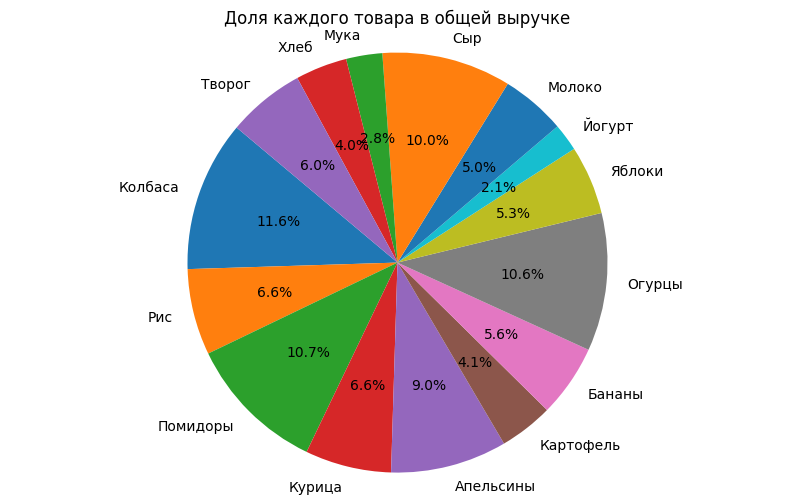

In [3]:
# Функция для создания круговой диаграммы
def create_pie_chart(product_revenue_share):
    labels = product_revenue_share.keys()
    sizes = product_revenue_share.values()
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Доля каждого товара в общей выручке')
    plt.show()

create_pie_chart(product_revenue_share)

### Вывод


Реализовал программу, которая считывает CVS файл с информацией о продажах в продуктовом магазине. Рассчитал общую выручку магазина, нашел товар, который был продан наибольшее количество раз и товар, принесший наибольшую выручку, вывел количество проданных единиц каждого товар и долю каждого товара в общей выручке. Создал диаграмму, продемонстрировав долю каждого товара в отношении к общей выручке. Использовал хеш-таблицу и сортировку пузырьком.